# APPLIED STATISTICS(ECS764P) : COURSEWORK-2

NAME: OMKAR ANANT BARE

STUDENT NUMBER : 220459749

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.integrate import quad
from scipy.stats import beta

# Question 1 Solution:

In [2]:
from scipy.stats import beta
def beta_measure(a, b):
    '''
    Returns probability mass of the interval [a,b] under the probability measure Beta(3,7).
    '''
    cdf_a = beta.cdf(a, 3, 7)
    cdf_b = beta.cdf(b, 3, 7)
    probability_mass = cdf_b - cdf_a
    
    return probability_mass

In [3]:
# Q1(a)
print(beta_measure(0,1))

1.0


In [4]:
# Q1(b)
print(beta_measure(0,0))

0.0


In [5]:
# Q1(c)
print(beta_measure(0.25,0.75))

0.599334716796875


In [6]:
# Q1(d)
print(beta_measure(0,0.5))

0.91015625


In [7]:
# Q1(e)
print(beta_measure(0.5,1))

0.08984375


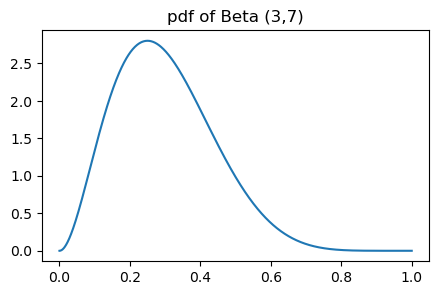

In [8]:
# pdf of Beta (3, 7)
x = np.linspace(0, 1, 1000)
y = beta.pdf(x ,3, 7)
plt.figure(figsize=(5,3))
plt.title('pdf of Beta (3,7)')
plt.plot(x,y);

# Question 2 Solution:

In [9]:
def beta_pdf(x):
    '''
    Returns probability measure Beta(3,7) evaluated at x.
    '''
    pdf_x = beta.pdf(x, 3, 7)
    
    return pdf_x

In [10]:
from scipy.integrate import quad #returns (integral, estimate of the absolute error)

In [11]:
# Q2(a)
print(quad(beta_pdf, 0, 1))
print(f'Integral: {quad(beta_pdf, 0, 1)[0]}\nestimate of the absolute error: {quad(beta_pdf, 0, 1)[1]}')

(1.0, 1.1102230246251565e-14)
Integral: 1.0
estimate of the absolute error: 1.1102230246251565e-14


In [12]:
# Q2(b)
print(quad(beta_pdf, 0, 0))
print(f'Integral: {quad(beta_pdf, 0, 0)[0]}\nestimate of the absolute error: {quad(beta_pdf, 0, 0)[1]}')

(0.0, 0.0)
Integral: 0.0
estimate of the absolute error: 0.0


In [13]:
# Q2(c)
print(quad(beta_pdf, 0.25, 0.75)) # 1/4 = 0.25, 3/4 = 0.75
print(f'Integral: {quad(beta_pdf, 0.25, 0.75)[0]}\nestimate of the absolute error: {quad(beta_pdf, 0.25, 0.75)[1]}')

(0.5993347167968752, 6.653952020450884e-15)
Integral: 0.5993347167968752
estimate of the absolute error: 6.653952020450884e-15


In [14]:
# Q2(d)
print(quad(beta_pdf, 0, 0.5)) # 1/2 = 0.5
print(f'Integral: {quad(beta_pdf, 0, 0.5)[0]}\nestimate of the absolute error: {quad(beta_pdf, 0, 0.5)[1]}')

(0.9101562500000001, 1.0104764247564903e-14)
Integral: 0.9101562500000001
estimate of the absolute error: 1.0104764247564903e-14


In [15]:
# Q2(e)
print(quad(beta_pdf, 0.5, 1)) # 1/2 = 0.5
print(f'Integral: {quad(beta_pdf, 0.5, 1)[0]}\nestimate of the absolute error: {quad(beta_pdf, 0.5, 1)[1]}')

(0.08984374999999999, 9.974659986866639e-16)
Integral: 0.08984374999999999
estimate of the absolute error: 9.974659986866639e-16


# Question 3 Solution:

The support of Beta(3,7) is [0,1] and support of Beta(7,3) is also [0,1] 

Therefore, support of Beta(3,7) + Beta(7,3) will be [0,2]

In [16]:
# function to implement the integrand in the question
def integrand(x, t):
    f1 = beta.pdf(x, 3, 7)
    f2 = beta.pdf(t-x, 7 ,3)
    return f1 * f2

In [17]:
#100 points (t1, . . . , t100) along the support of Beta (3, 7) + Beta (7, 3)
np.random.seed(1)
x = np.linspace(0,2,100)
x_100 = x

In [18]:
# Compute the integral
integrals = []
for i in range(100):
    integral = quad(integrand, -np.inf, np.inf, args=(x[i]))[0]
    integrals.append(integral)

In [19]:
display(integrals[:10], len(integrals))

[0.0,
 7.92114746501205e-14,
 6.96686667036812e-11,
 2.22387539199213e-09,
 2.845627971588317e-08,
 1.9821120415367692e-07,
 9.555198590223275e-07,
 3.5723266476732585e-06,
 1.108587100486892e-05,
 2.9834874980339145e-05]

100

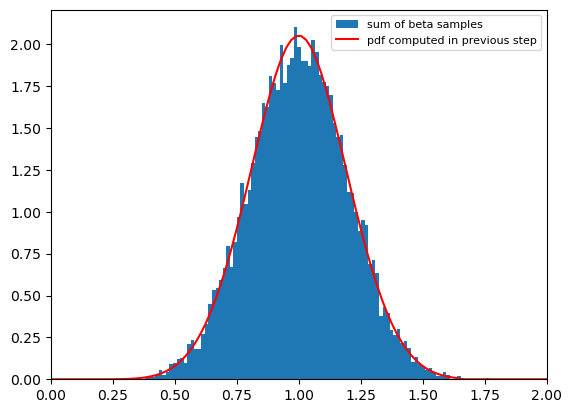

In [20]:
# Sample independently from two beta distributions
N = 10000
seed = 1
b1 = stats.beta.rvs(a=3,b=7, size = N, random_state = seed)
b2 = stats.beta.rvs(a=7, b=3, size = N, random_state = seed + 1)

# Adding the two beta distributions
b1_plus_b2 = b1 + b2

# plot the histogram of sums of beta samples along with the pdf computed in the previous step
fig, ax = plt.subplots()
ax.hist(b1_plus_b2, int(np.sqrt(N)), density = True, label = 'sum of beta samples')
ax.axis(xmin=0,xmax=2)
ax.plot(x_100, integrals, c='r', label='pdf computed in previous step') # x_100 = 100 points along the support of Beta (3, 7) + Beta (7, 3)
ax.legend(fontsize=8);

### Q3 Answer: It can be observed that the pdf computed in the previous set fits the distribution generated by adding two independent Beta distributions.

# Question 4 Solution:

In [21]:
import pandas_datareader
pandas_datareader.__version__ 

'0.10.0'

In [22]:
from pandas_datareader import data
my_data = data.DataReader('MSFT', 'yahoo', '2012-11-02', '2022-11-02')

In [23]:
display(my_data.head())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-11-02,29.770000,29.330000,29.590000,29.500000,57131600.0,24.194620
2012-11-05,29.740000,29.330000,29.620001,29.629999,38070800.0,24.301245
2012-11-06,30.200001,29.610001,29.820000,29.860001,43401500.0,24.489878
2012-11-07,29.830000,29.049999,29.530001,29.080000,57871800.0,23.850151
2012-11-08,29.370001,28.799999,29.120001,28.809999,49841800.0,23.628712


In [24]:
# Keep the "Close" column
my_data_close = my_data['Close'] 

In [25]:
display(my_data_close.head(), len(my_data_close))

Date
2012-11-02    29.500000
2012-11-05    29.629999
2012-11-06    29.860001
2012-11-07    29.080000
2012-11-08    28.809999
Name: Close, dtype: float64

2518

In [26]:
# function to compute the time series of (percentage) daily returns
def daily_return(x):  
  daily_returns = []
  for t in range(1, len(x)):
    return_t = 100 * ((x[t] / x[t-1]) - 1)
    daily_returns.append(return_t)
  return daily_returns

In [27]:
daily_returns = np.array(daily_return(my_data_close))

In [28]:
print(daily_returns[:5])

[ 0.44067512  0.77624521 -2.61219247 -0.92847475  0.06942193]


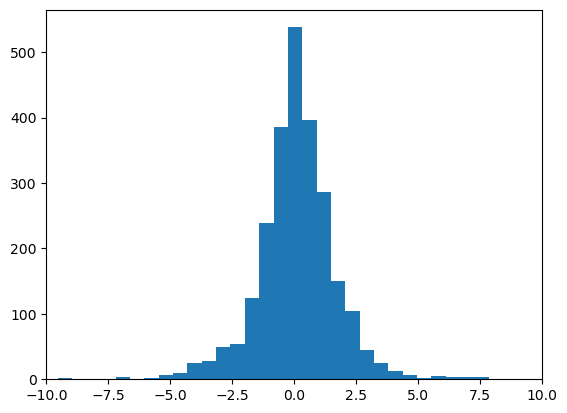

In [29]:
plt.hist(daily_returns, int(np.sqrt(len(daily_returns))));
plt.xlim(-10, 10);

In [30]:
display(scipy.stats.kurtosis(daily_returns), scipy.stats.skew(daily_returns))

8.807800316907603

-0.04548827521805432

In [31]:
display(stats.describe(daily_returns))

DescribeResult(nobs=2517, minmax=(-14.739031286425519, 14.216888119914373), mean=0.0941623373649645, variance=2.8548492538071355, skewness=-0.04548827521805432, kurtosis=8.807800316907603)

### Answer Q4: Due to the data's positive excess kurtosis, the 'Laplace distribution' will accurately model the distribution of daily returns data.

In [32]:
# Maximum Likelihood Estimators for the parameters of the distribution.
display(scipy.stats.fit(dist=stats.laplace, data=daily_returns))

  params: FitParams(loc=0.0, scale=1.0)
 success: True
 message: 'Optimization terminated successfully.'

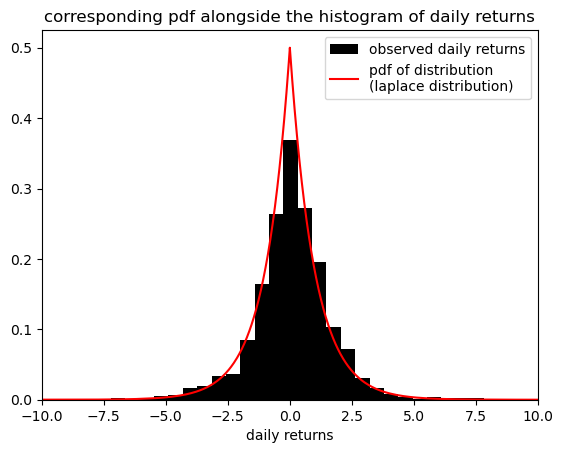

In [33]:
x = np.sort(daily_returns)
y = scipy.stats.laplace.pdf(np.sort(daily_returns))

# plot the corresponding pdf alongside the histogram of observed daily returns.
fig, ax = plt.subplots()

ax.hist(daily_returns, density=True, bins = int(np.sqrt(len(daily_returns))), color='black', label='observed daily returns')
ax.set(title='corresponding pdf alongside the histogram of daily returns',
       xlabel = 'daily returns')
ax.axis(xmin=-10,xmax=10)
ax.plot(x, y , color='red', label='pdf of distribution\n(laplace distribution)');
ax.legend(); 

In [34]:
# Functions required to generate QQ-Plot
def standardize(observation):
  z = (observation-np.mean(observation))/np.std(observation)
  return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles    

def pyqqplot(data1, data2):
    plt.figure()
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))
    plt.scatter(q1, q2 )

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    plt.plot([minim, maxim], [minim, maxim], 'r-')
    plt.title('QQ - Plot')
    plt.show()

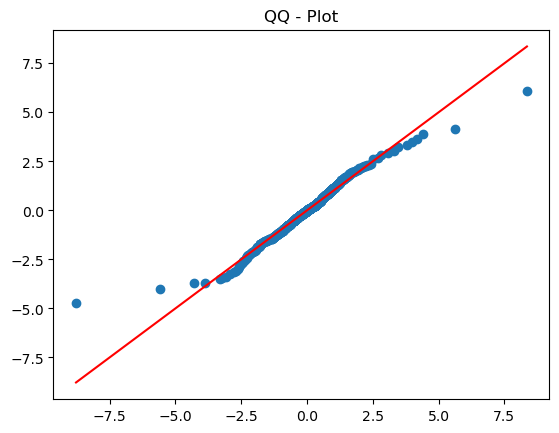

In [35]:
# QQ plot of the daily returns data versus the model (laplace model)
pyqqplot(np.sort(daily_returns), stats.laplace.rvs(size=len(daily_returns)))

### Answer Q4: The majority of the data points roughly lie on the diagonal line of the QQ plot, which indicates that the selected laplace distribution fits the daily returns data well.